# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp19 # use or create a database named demo
final_collection = db.final #use or create a collection named tweet_collection
final_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [10]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [ ]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [10]:
count = 100 #number of returned tweets, default and max is 100
geocode = "35.46984,-97.533904,100mi"  # defin the location, in Harrisonburg, VA
q = "COVID-19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [11]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        final_collection.insert_one(statuses)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [14]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            final_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Fri Dec 11 22:58:55 +0000 2020'
'Fri Dec 11 22:56:15 +0000 2020'
'Fri Dec 11 22:53:04 +0000 2020'
'Fri Dec 11 22:49:04 +0000 2020'
'Fri Dec 11 22:47:15 +0000 2020'
'Fri Dec 11 22:46:47 +0000 2020'
'Fri Dec 11 22:45:00 +0000 2020'
'Fri Dec 11 22:33:00 +0000 2020'
'Fri Dec 11 22:32:27 +0000 2020'
'Fri Dec 11 22:30:06 +0000 2020'
'Fri Dec 11 22:29:43 +0000 2020'
'Fri Dec 11 22:29:11 +0000 2020'
'Fri Dec 11 22:27:10 +0000 2020'
'Fri Dec 11 22:26:40 +0000 2020'
'Fri Dec 11 22:23:26 +0000 2020'
'Fri Dec 11 22:12:12 +0000 2020'
'Fri Dec 11 22:10:15 +0000 2020'
'Fri Dec 11 22:01:09 +0000 2020'
'Fri Dec 11 21:57:06 +0000 2020'
'Fri Dec 11 21:54:10 +0000 2020'
'Fri Dec 11 21:41:04 +0000 2020'
'Fri Dec 11 21:39:48 +0000 2020'
'Fri Dec 11 21:36:44 +0000 2020'
'Fri Dec 11 21:35:14 +0000 2020'
'Fri Dec 11 21:32:17 +0000 2020'
'Fri Dec 11 21:32:09 +0000 2020'
'Fri Dec 11 21:31:54 +0000 2020'
'Fri Dec 11 21:30:50 +0000 2020'
'Fri Dec 11 21:30:30 +0000 2020'
'Fri Dec 11 21:29:25 +0000 2020'
'Fri Dec 1

'Fri Dec 11 15:16:17 +0000 2020'
'Fri Dec 11 15:13:33 +0000 2020'
'Fri Dec 11 15:11:46 +0000 2020'
'Fri Dec 11 15:11:00 +0000 2020'
'Fri Dec 11 15:09:11 +0000 2020'
'Fri Dec 11 15:08:06 +0000 2020'
'Fri Dec 11 15:07:49 +0000 2020'
'Fri Dec 11 15:06:48 +0000 2020'
'Fri Dec 11 15:05:46 +0000 2020'
'Fri Dec 11 15:04:50 +0000 2020'
'Fri Dec 11 15:03:31 +0000 2020'
'Fri Dec 11 15:01:44 +0000 2020'
'Fri Dec 11 15:01:20 +0000 2020'
'Fri Dec 11 15:00:09 +0000 2020'
'Fri Dec 11 14:58:13 +0000 2020'
'Fri Dec 11 14:55:32 +0000 2020'
'Fri Dec 11 14:52:50 +0000 2020'
'Fri Dec 11 14:51:32 +0000 2020'
'Fri Dec 11 14:51:06 +0000 2020'
'Fri Dec 11 14:50:21 +0000 2020'
'Fri Dec 11 14:48:43 +0000 2020'
'Fri Dec 11 14:47:07 +0000 2020'
'Fri Dec 11 14:45:29 +0000 2020'
'Fri Dec 11 14:44:02 +0000 2020'
'Fri Dec 11 14:43:42 +0000 2020'
'Fri Dec 11 14:42:19 +0000 2020'
'Fri Dec 11 14:41:33 +0000 2020'
'Fri Dec 11 14:37:58 +0000 2020'
'Fri Dec 11 14:34:51 +0000 2020'
'Fri Dec 11 14:34:26 +0000 2020'
'Fri Dec 1

'Thu Dec 10 23:56:16 +0000 2020'
'Thu Dec 10 23:55:51 +0000 2020'
'Thu Dec 10 23:55:09 +0000 2020'
'Thu Dec 10 23:55:05 +0000 2020'
'Thu Dec 10 23:47:21 +0000 2020'
'Thu Dec 10 23:44:02 +0000 2020'
'Thu Dec 10 23:40:00 +0000 2020'
'Thu Dec 10 23:36:56 +0000 2020'
'Thu Dec 10 23:36:04 +0000 2020'
'Thu Dec 10 23:35:33 +0000 2020'
'Thu Dec 10 23:34:43 +0000 2020'
'Thu Dec 10 23:34:19 +0000 2020'
'Thu Dec 10 23:32:50 +0000 2020'
'Thu Dec 10 23:32:02 +0000 2020'
'Thu Dec 10 23:28:11 +0000 2020'
'Thu Dec 10 23:27:35 +0000 2020'
'Thu Dec 10 23:27:25 +0000 2020'
'Thu Dec 10 23:25:39 +0000 2020'
'Thu Dec 10 23:25:01 +0000 2020'
'Thu Dec 10 23:23:45 +0000 2020'
'Thu Dec 10 23:23:19 +0000 2020'
'Thu Dec 10 23:22:06 +0000 2020'
'Thu Dec 10 23:21:46 +0000 2020'
'Thu Dec 10 23:21:06 +0000 2020'
'Thu Dec 10 23:21:05 +0000 2020'
'Thu Dec 10 23:20:47 +0000 2020'
'Thu Dec 10 23:20:34 +0000 2020'
'Thu Dec 10 23:20:09 +0000 2020'
'Thu Dec 10 23:19:51 +0000 2020'
'Thu Dec 10 23:19:30 +0000 2020'
'Thu Dec 1

'Thu Dec 10 17:44:59 +0000 2020'
'Thu Dec 10 17:42:04 +0000 2020'
'Thu Dec 10 17:40:53 +0000 2020'
'Thu Dec 10 17:39:53 +0000 2020'
'Thu Dec 10 17:39:06 +0000 2020'
'Thu Dec 10 17:37:04 +0000 2020'
'Thu Dec 10 17:35:04 +0000 2020'
'Thu Dec 10 17:34:02 +0000 2020'
'Thu Dec 10 17:32:43 +0000 2020'
'Thu Dec 10 17:32:05 +0000 2020'
'Thu Dec 10 17:30:41 +0000 2020'
'Thu Dec 10 17:29:39 +0000 2020'
'Thu Dec 10 17:28:55 +0000 2020'
'Thu Dec 10 17:26:48 +0000 2020'
'Thu Dec 10 17:25:59 +0000 2020'
'Thu Dec 10 17:25:43 +0000 2020'
'Thu Dec 10 17:25:08 +0000 2020'
'Thu Dec 10 17:24:39 +0000 2020'
'Thu Dec 10 17:20:53 +0000 2020'
'Thu Dec 10 17:20:48 +0000 2020'
'Thu Dec 10 17:20:03 +0000 2020'
'Thu Dec 10 17:19:27 +0000 2020'
'Thu Dec 10 17:19:06 +0000 2020'
'Thu Dec 10 17:17:31 +0000 2020'
'Thu Dec 10 17:16:39 +0000 2020'
'Thu Dec 10 17:16:10 +0000 2020'
'Thu Dec 10 17:16:07 +0000 2020'
'Thu Dec 10 17:15:06 +0000 2020'
'Thu Dec 10 17:15:05 +0000 2020'
'Thu Dec 10 17:14:55 +0000 2020'
'Thu Dec 1

'Thu Dec 10 02:03:57 +0000 2020'
'Thu Dec 10 02:00:00 +0000 2020'
'Thu Dec 10 01:57:21 +0000 2020'
'Thu Dec 10 01:55:33 +0000 2020'
'Thu Dec 10 01:55:07 +0000 2020'
'Thu Dec 10 01:53:02 +0000 2020'
'Thu Dec 10 01:52:52 +0000 2020'
'Thu Dec 10 01:51:54 +0000 2020'
'Thu Dec 10 01:48:35 +0000 2020'
'Thu Dec 10 01:45:59 +0000 2020'
'Thu Dec 10 01:45:49 +0000 2020'
'Thu Dec 10 01:42:49 +0000 2020'
'Thu Dec 10 01:42:03 +0000 2020'
'Thu Dec 10 01:38:04 +0000 2020'
'Thu Dec 10 01:34:46 +0000 2020'
'Thu Dec 10 01:29:03 +0000 2020'
'Thu Dec 10 01:28:49 +0000 2020'
'Thu Dec 10 01:25:43 +0000 2020'
'Thu Dec 10 01:24:29 +0000 2020'
'Thu Dec 10 01:24:06 +0000 2020'
'Thu Dec 10 01:22:36 +0000 2020'
'Thu Dec 10 01:22:13 +0000 2020'
'Thu Dec 10 01:19:28 +0000 2020'
'Thu Dec 10 01:17:05 +0000 2020'
'Thu Dec 10 01:16:48 +0000 2020'
'Thu Dec 10 01:15:00 +0000 2020'
'Thu Dec 10 01:00:17 +0000 2020'
'Thu Dec 10 01:00:08 +0000 2020'
'Thu Dec 10 01:00:01 +0000 2020'
'Thu Dec 10 01:00:00 +0000 2020'
'Thu Dec 1

'Wed Dec 09 18:13:16 +0000 2020'
'Wed Dec 09 18:12:14 +0000 2020'
'Wed Dec 09 18:11:06 +0000 2020'
'Wed Dec 09 18:10:17 +0000 2020'
'Wed Dec 09 18:09:34 +0000 2020'
'Wed Dec 09 18:07:34 +0000 2020'
'Wed Dec 09 18:06:53 +0000 2020'
'Wed Dec 09 18:04:44 +0000 2020'
'Wed Dec 09 18:04:00 +0000 2020'
'Wed Dec 09 17:58:46 +0000 2020'
'Wed Dec 09 17:57:49 +0000 2020'
'Wed Dec 09 17:57:42 +0000 2020'
'Wed Dec 09 17:56:41 +0000 2020'
'Wed Dec 09 17:56:01 +0000 2020'
'Wed Dec 09 17:54:19 +0000 2020'
'Wed Dec 09 17:52:07 +0000 2020'
'Wed Dec 09 17:50:19 +0000 2020'
'Wed Dec 09 17:50:05 +0000 2020'
'Wed Dec 09 17:49:31 +0000 2020'
'Wed Dec 09 17:48:03 +0000 2020'
'Wed Dec 09 17:46:40 +0000 2020'
'Wed Dec 09 17:46:23 +0000 2020'
'Wed Dec 09 17:45:07 +0000 2020'
'Wed Dec 09 17:45:06 +0000 2020'
'Wed Dec 09 17:44:22 +0000 2020'
'Wed Dec 09 17:42:35 +0000 2020'
'Wed Dec 09 17:41:58 +0000 2020'
'Wed Dec 09 17:41:30 +0000 2020'
'Wed Dec 09 17:40:24 +0000 2020'
'Wed Dec 09 17:37:27 +0000 2020'
'Wed Dec 0

'Wed Dec 09 12:28:03 +0000 2020'
'Wed Dec 09 12:21:11 +0000 2020'
'Wed Dec 09 12:13:20 +0000 2020'
'Wed Dec 09 12:13:05 +0000 2020'
'Wed Dec 09 12:01:19 +0000 2020'
'Wed Dec 09 11:55:53 +0000 2020'
'Wed Dec 09 11:49:51 +0000 2020'
'Wed Dec 09 11:49:03 +0000 2020'
'Wed Dec 09 11:44:39 +0000 2020'
'Wed Dec 09 11:40:37 +0000 2020'
'Wed Dec 09 11:40:06 +0000 2020'
'Wed Dec 09 11:32:22 +0000 2020'
'Wed Dec 09 11:25:53 +0000 2020'
'Wed Dec 09 11:22:45 +0000 2020'
'Wed Dec 09 10:10:54 +0000 2020'
'Wed Dec 09 10:09:34 +0000 2020'
'Wed Dec 09 09:46:03 +0000 2020'
'Wed Dec 09 09:43:51 +0000 2020'
'Wed Dec 09 08:40:45 +0000 2020'
'Wed Dec 09 08:29:18 +0000 2020'
'Wed Dec 09 08:15:11 +0000 2020'
'Wed Dec 09 07:59:32 +0000 2020'
'Wed Dec 09 07:14:04 +0000 2020'
'Wed Dec 09 07:09:48 +0000 2020'
'Wed Dec 09 06:53:14 +0000 2020'
'Wed Dec 09 06:49:28 +0000 2020'
'Wed Dec 09 06:37:34 +0000 2020'
'Wed Dec 09 06:32:51 +0000 2020'
'Wed Dec 09 06:25:07 +0000 2020'
'Wed Dec 09 06:22:47 +0000 2020'
'Wed Dec 0

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [15]:
print(final_collection.estimated_document_count())# number of tweets collected

user_cursor = final_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

4448
2196


Create a text index and print the Tweets containing specific keywords. 

In [16]:
final_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [17]:
tweet_cursor = final_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [18]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Ken Ragsdale
text: #Oklahoma #covid19 dashboard 12132020 (new format) https://t.co/HdmdYYicaf
----
name: Venerate Behavioral Services
text: Helping Kids Cope With COVID-19

#ChildMentalHealth #COVID19

https://t.co/6JGqtzGH7W
----
name: Ken Ragsdale
text: @HealthyOklahoma #COVID19  Vaccine Priority Population
Framework for #Oklahoma https://t.co/MrXVbJqrJB
----
name: OKC Office of Emergency Management (OKC OEM)
text: Now that the #Covid19 #Vaccine is here, you may have some questions. @CDCgov has some answers:… https://t.co/GUX8GyAy2v
----
name: Suzanne Wheeler
text: With a COVID-19 vaccine on the horizon, what does that mean for travel? #Travel #COVID19 https://t.co/PN0B1jW8Kd
----
name: M Provenzano
text: Wear a MASK. Kids are testing positive daily. 
#COVID #Covid_19 #COVID19 #coronavirus #kidstestingpositive #CDC
----
name: Brandy McDonnell
text: .@OfficialJackson's #Tulsa concert at @BOKCenter rescheduled again due to #COVID19 pandemic https://t.co/2YjvHakGw0
----
name:

In [19]:
tweet_cursor = final_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pandas to display tweets

In [20]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities,retweeted_status
0,5fdbd9682381ad9070448ac0,Sun Dec 13 14:26:33 +0000 2020,1338128177621852160,1338128177621852160,#Oklahoma #covid19 dashboard 12132020 (new for...,False,"{'hashtags': [{'text': 'Oklahoma', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,5fdbd98e2381ad9070449115,Thu Dec 10 02:25:54 +0000 2020,1336859658112286720,1336859658112286720,Helping Kids Cope With COVID-19\n\n#ChildMenta...,False,"{'hashtags': [{'text': 'ChildMentalHealth', 'i...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,5fdbd9872381ad9070448e2d,Fri Dec 11 13:31:53 +0000 2020,1337389644514783236,1337389644514783236,@HealthyOklahoma #COVID19 Vaccine Priority Po...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,5fdbd95c2381ad9070448696,Tue Dec 15 15:28:20 +0000 2020,1338868500098592769,1338868500098592769,"Now that the #Covid19 #Vaccine is here, you ma...",True,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,7,False,False,False,en,1.338590e+18,1338590474131660800,{'created_at': 'Mon Dec 14 21:03:33 +0000 2020...,NaN,NaN
4,5fdbd98d2381ad907044908e,Thu Dec 10 13:46:43 +0000 2020,1337030988753293312,1337030988753293312,"With a COVID-19 vaccine on the horizon, what d...",False,"{'hashtags': [{'text': 'Travel', 'indices': [7...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://hearsaysystems.com"" rel=""nofol...",NaN,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
5,5fdbd98c2381ad9070449039,Thu Dec 10 16:41:01 +0000 2020,1337074855452307456,1337074855452307456,Wear a MASK. Kids are testing positive daily. ...,False,"{'hashtags': [{'text': 'COVID', 'indices': [47...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
6,5fdbd96a2381ad9070448bc7,Sat Dec 12 18:04:40 +0000 2020,1337820682110050305,1337820682110050305,.@OfficialJackson's #Tulsa concert at @BOKCent...,False,"{'hashtags': [{'text': 'Tulsa', 'indices': [20...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
7,5fdbd9842381ad9070448ced,Fri Dec 11 22:10:15 +0000 2020,1337520097779453952,1337520097779453952,From my third grade teacher. #WearAMask #COVID...,False,"{'hashtags': [{'text': 'WearAMask', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,4,False,False,False,en,NaN,NaN,NaN,"{'media': [{'id': 1337520091907448832, 'id_str...",NaN
8,5fdbd95c2381ad9070448695,Tue Dec 15 15:28:52 +0000 2020,1338868637235638273,1338868637235638273,RT @okcoem: Now that the #Covid19 #Vaccine is ...,False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,False,en,1.338590e+18,1338590474131660800,NaN,NaN,{'created_at': 'Tue Dec 15 15:28:20 +0000 2020...
9,5fdbd95a2381ad907044858f,Tue Dec 15 23:45:15 +0000 2020,1338993554606202885,1338993554606202885,RT @pmonies: @HealthyOklahoma NEW: Persons und...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/ip

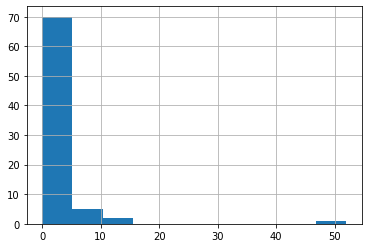

In [21]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count